## Exercise 6.9

In [2]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.
from __future__ import division
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
import pylab
import numpy as np
import numpy.matlib
#import sklearn.preprocessing
import matplotlib.pyplot as plt
#import mpl_toolkits.mplot3d 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold

"""%matplotlib notebook"""
warnings.filterwarnings('ignore')

First a simple data loading function.

In [3]:
# load data
def load_data(filename):
    data = np.array(np.genfromtxt(filename, delimiter=','))  
    x = data[:,:-1]# np.reshape(data[:,0:1],(np.size(data[:,0:1]),1))
    y = np.reshape(data[:,-1],(np.size(data[:,-1]),1))
    return x,y

Now we need a function to transform input features into Fourier features.

In [4]:
def poly_features(x,D):
    """generates polynomial features with orders ranging from 0->D"""
    x.shape = (x.size,1)
    order = np.tile(np.arange(0,D+1), (x.size,1))
    F = np.power( np.tile(x, (1,D+1)), order) # []   
    return F.T



def poly_features_multiDim(x,D):
    """generates polynomial features with orders ranging from 0->D"""   
    #return x[:,0:D+1].T   
   # F = np.zeros((D+1, x.shape[0]))  
   # F[0,:] = np.ones((1,x.shape[0])) 
   # F[1:,:] = x[:,0:D].T  
   # print(D)

    #return F
    poly = PolynomialFeatures(D)
    F = poly.fit_transform(x)  
    return F.T

def fourier_features(x,D):
    """takes fourier coefficients"""
    x.shape = (x.size,1)
    F = np.zeros((2*D+1, x.size))    
    F[0,:] = np.ones((1,x.size))      
    for i in np.arange(1,D+1):        
        F[2*i-1,:] = np.cos(2*np.pi*x*i).flatten()
        F[2*i,:] = np.sin(2*np.pi*x*i).flatten()         
    return F

def softmax_grad(F,y,w,nIter):
    alpha = 10**-2#10**-2    
    for k in range(nIter): 
        r = np.zeros((F.shape[1],1))
        for p in range(y.shape[0]):
            r = r + -1 * sigmoid(-y[p] * (F.T @ w)) * y[p]
        grad = F @ r     
        w = w - alpha * grad
    return w

def sigmoid(t):
    return 1/(1 + np.exp(-t))


In [165]:
# plot the polynomial  

def plot_model_2D(w,D,y,ax,plot_color):
    # plot determined surface in 3d space
    s = np.arange(0, 1, .025)#.025)
    ns = s.size
    
    s.shape = (ns,1)
    sx, sy = np.meshgrid(s,s)
    sx2 = sx.flatten()
    sx2.shape = (sx2.size,1)
    sy2 = sy.flatten()
    sy2.shape = (sy2.size,1)
    s = np.concatenate((sx2,sy2),axis=1)   

    f = poly_features_multiDim(s,D)
    z = np.dot(f.T,w)
    z = np.reshape(z,sx.shape)
    
 
    ax.contour(sx, sy, z, levels=[0])
    plt.axis([-.05,1.05,-.05,1.05])
    #plt.axis([-.1,2,-1,2])
    return ax

def plot_model_3D_fake(w,D,y,ax,plot_color):
    # plot determined surface in 3d space
    s = np.arange(0, 1, .025)#.025)
    ns = s.size
    
    s.shape = (ns,1)
    sx, sy, sz = np.meshgrid(s,s,s)
    sx2 = sx.flatten()
    sx2.shape = (sx2.size,1)
    sy2 = sy.flatten()
    sy2.shape = (sy2.size,1)
    sz2 = sz.flatten()
    sz2.shape = (sz2.size,1)
    s = np.concatenate((sx2,sy2,sz2),axis=1)   

    f = poly_features_multiDim(s,D)
    z = np.dot(f.T,w)
    z = np.reshape(z,sx.shape)
 
    #print(z.shape)
    #ax.contour(np.mean(sx,axis=2), np.mean(sy,axis=2), np.mean(z,axis=2), levels=[0])
  #  ax.contour(sx[:,:,1], sy[:,:,1], z[:,:,1], levels=[0])
  #  ax.contour(sx[:,:,20], sy[:,:,20], z[:,:,20], levels=[0])
  #  ax.contour(sx[:,:,-1], sy[:,:,-1], z[:,:,-1], levels=[0])
    plt.axis([-.05,1.05,-.05,1.05])
    #plt.axis([-.1,2,-1,2])
    return ax


def plot_model_3D(ax,w,D,y,plot_color):
    # plot determined surface in 3d space
    s = np.arange(0, 1, .025)
    ns = s.size
    
    s.shape = (ns,1)
    sx, sy, sz = np.meshgrid(s,s,s)
    sx2 = sx.flatten()
    sx2.shape = (sx2.size,1)
    sy2 = sy.flatten()
    sy2.shape = (sy2.size,1)
    sz2 = sz.flatten()
    sz2.shape = (sz2.size,1)
    s = np.concatenate((sx2,sy2,sz2),axis=1)   

    f = poly_features_multiDim(s,D)
    z = np.dot(f.T,w)
    z = np.reshape(z,sx.shape)
 
    verts, faces, _, _ = measure.marching_cubes_lewiner(z, 0, spacing=(0.025, 0.025, 0.025))#spacing=(0.1, 0.1, 0.1))

    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    #ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
    #                cmap='Spectral', lw=1, alpha = .3)

    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                    color='r', lw=1, alpha = .5)
    
   # plt.axis([-.05,1.05,-.05,1.05])
    return ax

def plot_mse(ax, mses, deg, plot_color, legStr, titStr,xStr):
    plt.sca(ax)
    #plt.plot(np.arange(1,np.size(mses)+1),mses,'--', color = plot_color, label=legStr)
    plt.plot(deg,mses,'--^', color = plot_color, label=legStr)
    plt.title(titStr, fontsize=28)
    plt.xlabel(xStr, fontsize=28)
    plt.ylabel('error', fontsize=28)
    plt.xlabel('degree D', fontsize=28)
            
# plot data 
def plot_data_1D(x,y,i,plot_color, grid):
    plt.subplot(grid[int(np.floor(i/3)), (i % 3) ])
    plt.scatter(x,y,s = 30, color = plot_color)
    plt.axis([-.1,1.1,-.1,1.1])
    s = 'Hold out #' + str(i)
    plt.title(s, fontsize=15)

# plot data 
def plot_data(x,i,plot_color, grid,sT=30, alphaT =1):
    plt.subplot(grid[int(np.floor(i/3)), (i % 3) ])
    plt.scatter(x[:,0],x[:,1],s = sT, color = plot_color, alpha=alphaT)
    plt.axis([-.1,1.1,-.1,1.1])
    s = 'Hold out #' + str(i)
    plt.title(s, fontsize=15)
    
# plot data 3D  
def plot_data_3D(ax, x,plot_color,sT=30, alphaT =1):
  #  plt.subplot(grid[int(np.floor(i/3)), (i % 3) ], projection='3d')
    ax.scatter(x[:,0],x[:,1],x[:,2],s = sT, color = plot_color, alpha=alphaT)
 
    
# plot data 
def plot_data_final(x,plot_color, grid):        
    plt.subplot(grid[0,3])
    plt.scatter(x[:,0],x[:,1],s = 30, color = plot_color)        
    
# plot data 3D
def plot_data_final_3D(ax, x,plot_color):        
    #plt.subplot(grid[0,3], projection='3d')
    ax.scatter(x[:,0],x[:,1],x[:,2], color = plot_color, s = 5)     
    
def partition_indices(length, n):
    indices = np.arange(length)
    np.random.shuffle(indices)
    q, r = divmod(length, n)
    stIndices = [q*i + min(i, r) for i in range(n+1)]
    return [indices[stIndices[i]:stIndices[i+1]] for i in range(n)]  

def partition_indices_better(x, y, k):
    kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    return [test_index for test_index, test_index in kf.split(x, y)]  
 
    
def get_classification_res(yTrue, yPredicted):  
    TP = np.logical_and(yTrue, yPredicted)
    TN = np.logical_and(np.logical_not(yTrue), np.logical_not(yPredicted))
    FP = np.logical_and(np.logical_not(yTrue), yPredicted)
    FN = np.logical_and(yTrue, np.logical_not(yPredicted))
    return TP, TN, FP, FN

In [168]:
# run over all the degrees, fit each models, and calculate errors
def hold_out_validation(x, y, k, deg_range, is_train):  
    nP = x.shape[0]
    is_in = y == 1
    is_out = np.logical_not(is_in)
    
    #indices = partition_indices(nP, k)
    
    indices = partition_indices_better(x,y,k)
    
    #grid = plt.GridSpec(2, 4, wspace=0.15, hspace=0.3)
    color_test = 'orange'    
    color_train = 'blue'
    fig = plt.figure(figsize = (16,16))#20))
    ax = fig.add_subplot(111)    
    #ax1 = fig.add_subplot(221, projection = '3d')    
    #ax2 = fig.add_subplot(222, projection = '3d')     

    mses_test = np.zeros((deg_range.size,1))
    mses_train = np.zeros((deg_range.size,1))
    

    is_test = np.logical_not(is_train)  

    yTrain = y[is_train]
    yTest  = y[is_test]

    for D in np.arange(0,np.size(deg_range)):
        print(D/np.size(deg_range))
        # First we find the optimal number of features for this training set  

        F_train = poly_features_multiDim(x[is_train,:], deg_range[D])                
        F_test  = poly_features_multiDim(x[is_test,:], deg_range[D])   

        temp = np.linalg.pinv(np.dot(F_train, F_train.T))             
        w = np.dot(np.dot(temp, F_train),yTrain) 

        trainMSEtemp = np.sign(-yTrain * np.dot(F_train.T, w))
        trainMSEtemp[trainMSEtemp < 0] = 0

        testMSEtemp = np.sign(-yTest * np.dot(F_test.T, w))
        testMSEtemp[testMSEtemp < 0] = 0

        mses_train[D] = np.sum(trainMSEtemp)/trainMSEtemp.shape[0]
        mses_test[D] = np.sum(testMSEtemp)/testMSEtemp.shape[0]

    # choose best case number of features and plot the final model
    deg_final = deg_range[np.argmin(mses_test)]   
    F_train = poly_features_multiDim(x[is_train,:], deg_final) 
    F_test  = poly_features_multiDim(x[is_test,:], deg_final)   
    F = poly_features_multiDim(x, deg_final)
    temp = np.linalg.pinv(np.dot(F_train, F_train.T))             
    w_Final = np.dot(np.dot(temp, F_train), yTrain)      
       
   # mse_train = mses_train# numpy.mean(mses_train, axis=0)
   # mse_test = mses_test#numpy.mean(mses_test, axis=0)
    #ax = fig.add_subplot(2, 2, 4)
    plot_mse(ax, mses_test, deg_range, color_test, 'Testing Error','','')
    plot_mse(ax, mses_train, deg_range, color_train, 'Training Error', 'Average MSE','degree D')
    plt.legend(fontsize=25)
    
  
    # get and plot weights for FINAL model         
    #deg_final = deg_range[np.argmin(mse_test)]       
                           
   # temp = np.linalg.pinv(np.dot(F,F.T))             
   # w = np.dot(np.dot(temp,F),y) 
    
     
    mse_all_final = np.sign(-y * np.dot(F.T, w_Final))
    mse_all_final[mse_all_final < 0] = 0
    
   #finalEstimation = np.sign(-yTest * np.dot(F_test.T, w))

    #ax =  plt.subplot(grid[0,3])
   # ax = fig.add_subplot(2, 3, 1)
    
   # plot_data_final_3D(ax2, x[np.squeeze(is_out),:], 'g')
   # plot_data_final_3D(ax2, x[np.squeeze(is_in),:], 'r')

    #plot_model_3D(ax2, w_Final, deg_final, y, 'r')
    #ax4.view_init(elev=20., azim=42)
 #   ax2.view_init(30, 120)
 #   ax2.set_title('Average Model: D = %i' % deg_final, fontsize=14)    
 #   plt.title('Average Model: D = %i' % deg_final, fontsize=14)
 #   plt.show()  
    
    return  mse_all_final#w, deg_final, is_in, is_out 

0.0
0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6
0.6333333333333333
0.6666666666666666
0.7


KeyboardInterrupt: 

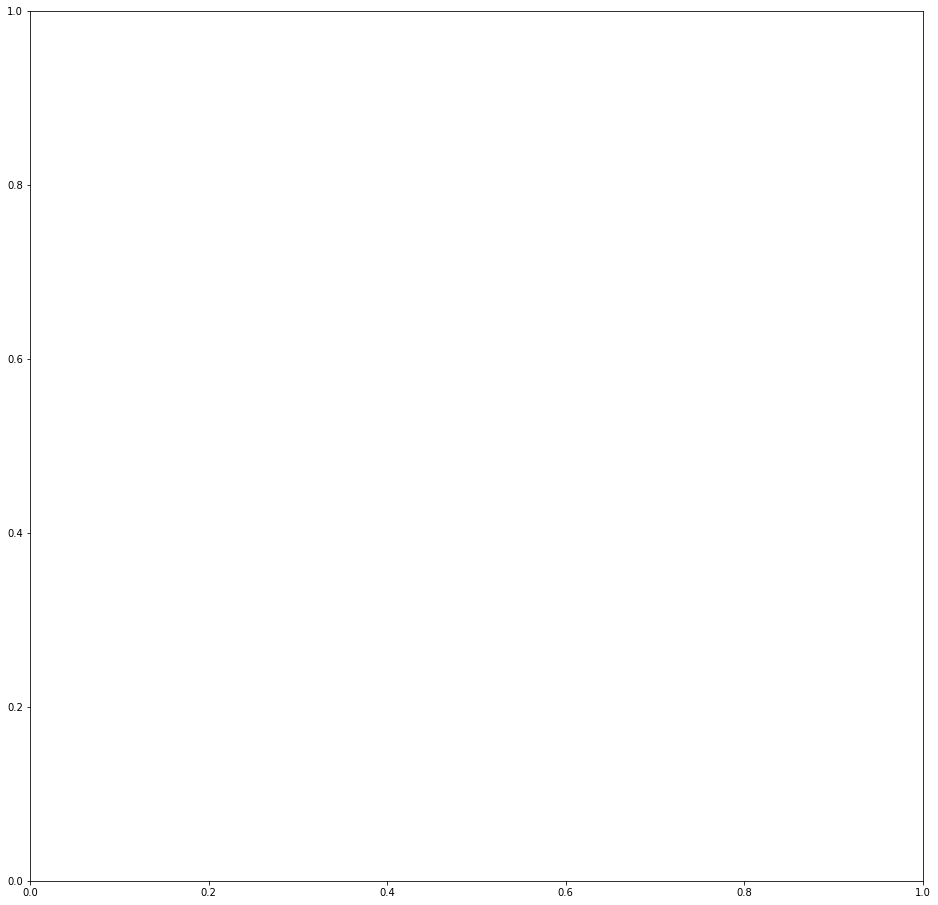

In [170]:
# load data and defined degree range  
import random
x, y = load_data('data_dn4_3d\DATA_W1_downsampled.csv')
nImg = 1;

imgNum = np.arange(2,11); 
random.shuffle(imgNum)

imgNums = np.ones((y.shape));

for i in imgNum:#range(2,11):#5):#11):
    nImg += 1    
    xT, yT = load_data('data_dn4_3d\DATA_W' + str(i) + '_downsampled.csv')
    imgNums = np.concatenate((imgNums, i * np.ones((yT.shape))),axis=0);
    x = np.concatenate((x,xT),axis=0);
    y =  np.concatenate((y,yT),axis=0)


for i in range(x.shape[1]):
    x[:,i] = (x[:,i] - np.min(x[:,i]))/np.ptp(x[:,i])

is_train = np.zeros(x.shape[0], dtype=bool)
is_train[0:-np.int(x.shape[0]/nImg)] = True
is_test = np.logical_not(is_train)

y[y==0] = -1; 

# hold out validation
k = 10

# degrees to test
deg_range = np.arange(0,30)   # for 10

final_est = hold_out_validation(x,y,k,deg_range, is_train)


imsize:  (512, 512, 4)
tp:  (16384,)


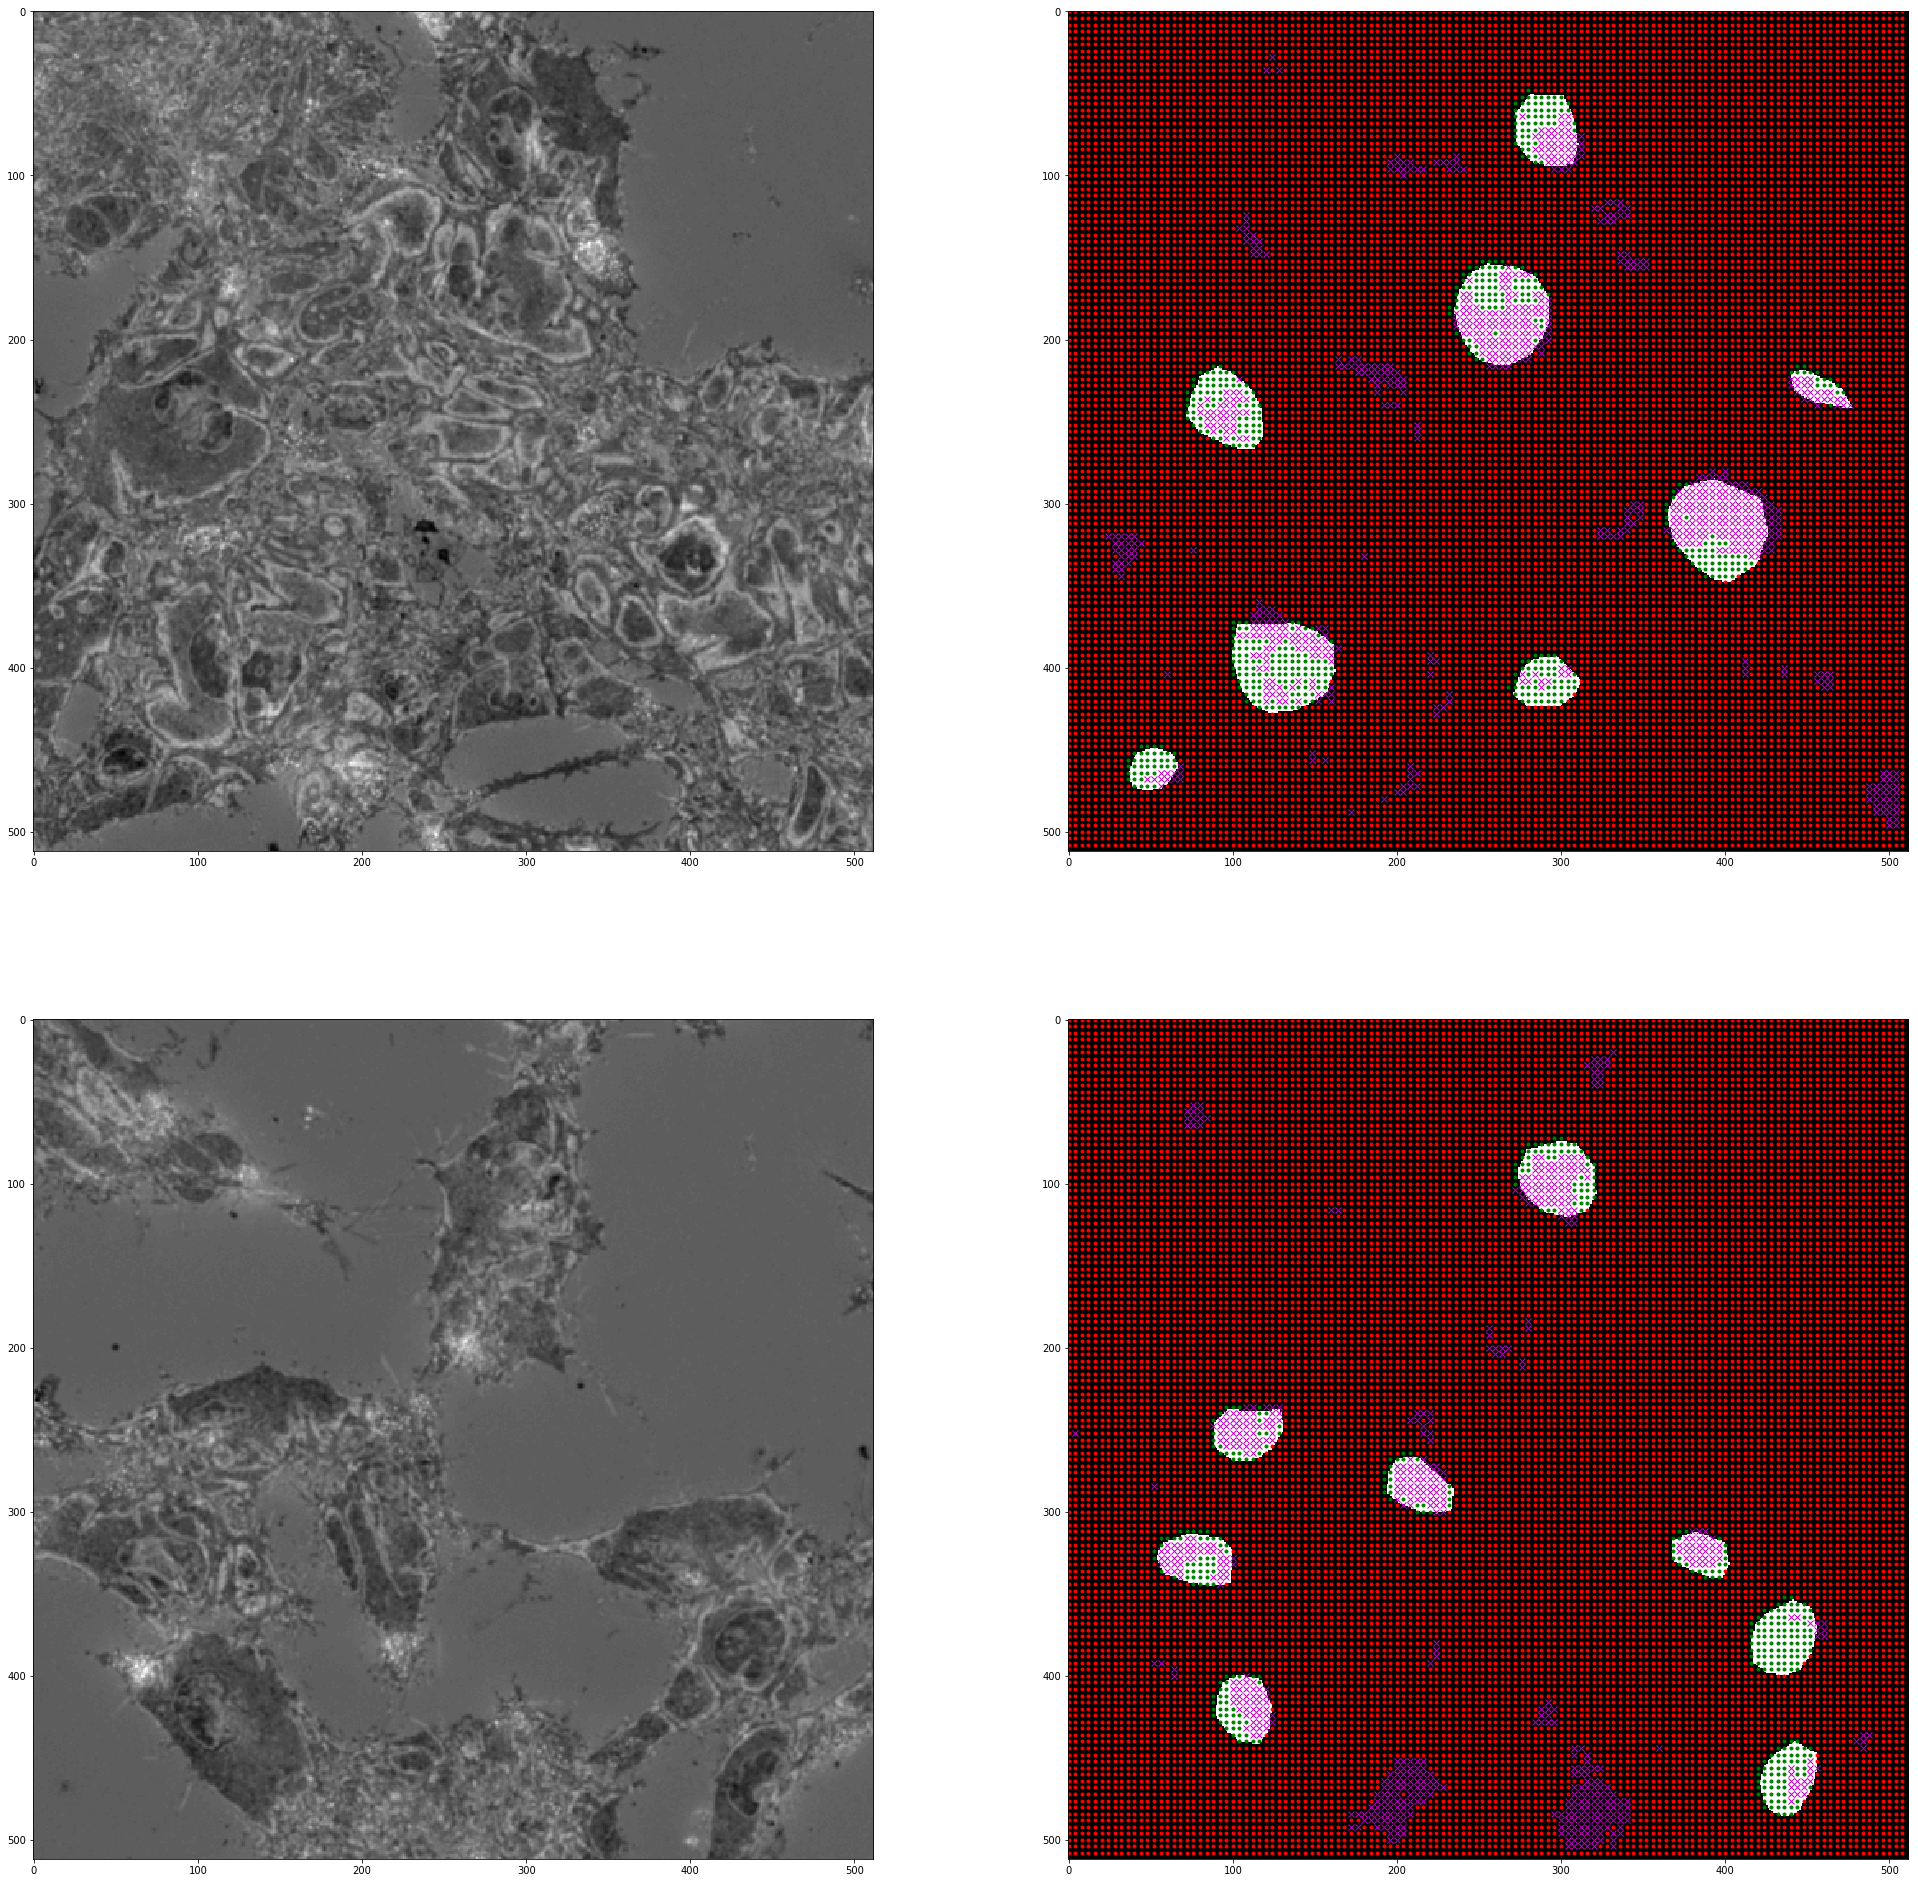

In [135]:
#from IPython.display import Image
#from IPython.core.display import HTML 
import matplotlib.image as mpimg
PATH = "data_dn4_3d/"


sx, sy = np.meshgrid(np.arange(0,512,4),np.arange(0,512,4))    
sx = sx.flatten()
sy = sy.flatten()

cellTrainToView = 6; 
img1 = mpimg.imread(PATH + "Cell" + str(cellTrainToView) +"_imbd.png")
img2 = mpimg.imread(PATH + "Cell" + str(cellTrainToView) +"_bw.png")
print('imsize: ', img2.shape)
_, yTrained = load_data('data_dn4_3d\DATA_W' + str(cellTrainToView) + '_downsampled.csv')
yTrained_Model = final_est[imgNums==cellTrainToView]
yTrained = yTrained ==1;  yTrained = yTrained.reshape((-1,)) 
yTrained_Model = yTrained_Model == 1; 

TP1, TN1, FP1, FN1 = get_classification_res(yTrained, yTrained_Model)


img3 = mpimg.imread(PATH + "Cell" + str(imgNum[-1]) + "_imbd.png")
img4 = mpimg.imread(PATH + "Cell" + str(imgNum[-1]) + "_bw.png")    
_, yTested = load_data('data_dn4_3d\DATA_W' + str(imgNum[-1]) + '_downsampled.csv')
yTested_Model = final_est[imgNums==imgNum[-1]] 
yTested = yTested ==1;  yTested = yTested.reshape((-1,)) 
yTested_Model = yTested_Model == 1; 



TP2, TN2, FP2, FN2 = get_classification_res(yTested, yTested_Model)   

    
print('tp: ',TP2.shape)    
    
plt.figure(figsize = (34,34))
plt.subplot(221)
plt.imshow(img1); 

plt.subplot(222)
plt.imshow(img2)
plt.plot( sy[TP1],sx[TP1],'g.')
plt.plot( sy[TN1],sx[TN1],'r.')
plt.plot( sy[FP1],sx[FP1],'mx')
plt.plot( sy[FN1],sx[FN1],'mx')


plt.subplot(223)
plt.imshow(img3); 

plt.subplot(224)
plt.imshow(img4)
plt.plot(sy[TP2],sx[TP2], 'g.')
plt.plot(sy[TN2],sx[TN2], 'r.')
plt.plot( sy[FP2],sx[FP2],'mx')
plt.plot( sy[FN2],sx[FN2],'mx')

plt.show()

    
#ax = fig.add_subplot(111, projection='3d')
#axarr[0,0].plot(1,1)
#i = Image.open(filename = PATH + "Cell1_imbd.png", width=300, height=300)

#Image(filename = PATH + "Cell1_imbd.png", width=300, height=300)

#axarr[0,1]
#Image(filename = PATH + "Cell1_bw.png", width=300, height=300)
